In [23]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import spacy
import pickle
import random
import datetime as dt
import matplotlib.pyplot as plt

from spacy import displacy

## Load training data

In [3]:
with open('data/train_data', 'rb') as file:
    train = pickle.load(file)

## Train without tuning

In [17]:
def create_blank_nlp(train_data):
    nlp = spacy.blank('en')
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
    ner = nlp.get_pipe('ner')
    for _, annotations in train_data:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])
    return nlp

In [18]:
import random
import datetime as dt

In [19]:
nlp1 = create_blank_nlp(train_data=train)
optimizer = nlp1.begin_training()

In [23]:
loss_score = []
for i in range(20):
  random.shuffle(train)
  losses = {}
  for text, annotations in train:
    nlp1.update([text], [annotations], sgd=optimizer, losses=losses)
  loss_score.append(losses['ner'])
  print(f'Losses at iteration {i} - {dt.datetime.now()}', losses)

Losses at iteration 0 - 2021-03-03 14:32:57.790655 {'ner': 1.9628487710156406}
Losses at iteration 1 - 2021-03-03 14:32:59.160777 {'ner': 2.0411232527120254e-05}
Losses at iteration 2 - 2021-03-03 14:33:00.418255 {'ner': 1.0338885374366733e-07}
Losses at iteration 3 - 2021-03-03 14:33:01.729257 {'ner': 6.721449685895385e-08}
Losses at iteration 4 - 2021-03-03 14:33:03.025675 {'ner': 4.619639819728946e-08}
Losses at iteration 5 - 2021-03-03 14:33:04.340103 {'ner': 3.518272034827332e-08}
Losses at iteration 6 - 2021-03-03 14:33:05.696795 {'ner': 2.9528284962392365e-08}
Losses at iteration 7 - 2021-03-03 14:33:06.999695 {'ner': 2.09436979530863e-08}
Losses at iteration 8 - 2021-03-03 14:33:08.245478 {'ner': 1.5400922231149433e-08}
Losses at iteration 9 - 2021-03-03 14:33:09.523215 {'ner': 1.2662813947254402e-08}
Losses at iteration 10 - 2021-03-03 14:33:10.768569 {'ner': 1.0069662021064781e-08}
Losses at iteration 11 - 2021-03-03 14:33:12.095983 {'ner': 8.259904697281033e-09}
Losses at it

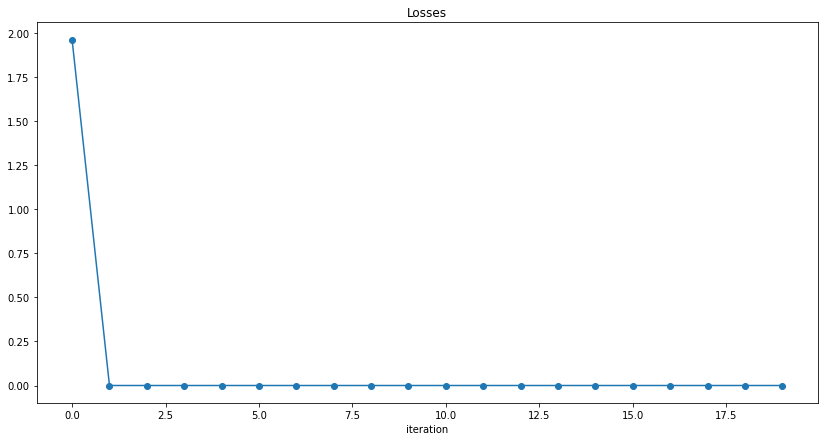

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(loss_score, '-o')
plt.xlabel('iteration')
plt.title('Losses');
plt.savefig('assets/loss_no_batching.png')

In [19]:
test_doc = nlp('I would love to play Fed Cup and French Open')

In [22]:
displacy.render(test_doc, style='ent')

In [40]:
nlp.to_disk('models/nlp_ner1')

## Train with batching

In [29]:
from spacy.util import minibatch, compounding

In [19]:
nlp2 = create_blank_nlp(train_data=train)
optimizer = nlp2.begin_training()

In [30]:
loss8 = []
for i in range(20):
  # losses2 = {}
  batches = minibatch(train, size=compounding(4.0, 28.0, 1.001))
  for batch in batches:
    texts, annotations = zip(*batch)
    nlp2.update(
        texts,
        annotations,
        drop=.4,
        losses=losses
    )
  loss8.append(losses['ner'])
  print(f'Losses at iteration {i} - {dt.datetime.now()}', losses)

Losses at iteration 0 - 2021-03-03 14:36:47.533568 <built-in method values of dict object at 0x7f08460858c0>
Losses at iteration 1 - 2021-03-03 14:36:48.068788 <built-in method values of dict object at 0x7f08460858c0>
Losses at iteration 2 - 2021-03-03 14:36:48.593615 <built-in method values of dict object at 0x7f08460858c0>
Losses at iteration 3 - 2021-03-03 14:36:49.113958 <built-in method values of dict object at 0x7f08460858c0>
Losses at iteration 4 - 2021-03-03 14:36:49.599312 <built-in method values of dict object at 0x7f08460858c0>
Losses at iteration 5 - 2021-03-03 14:36:50.038214 <built-in method values of dict object at 0x7f08460858c0>
Losses at iteration 6 - 2021-03-03 14:36:50.476605 <built-in method values of dict object at 0x7f08460858c0>
Losses at iteration 7 - 2021-03-03 14:36:50.909282 <built-in method values of dict object at 0x7f08460858c0>
Losses at iteration 8 - 2021-03-03 14:36:51.337024 <built-in method values of dict object at 0x7f08460858c0>
Losses at iteration

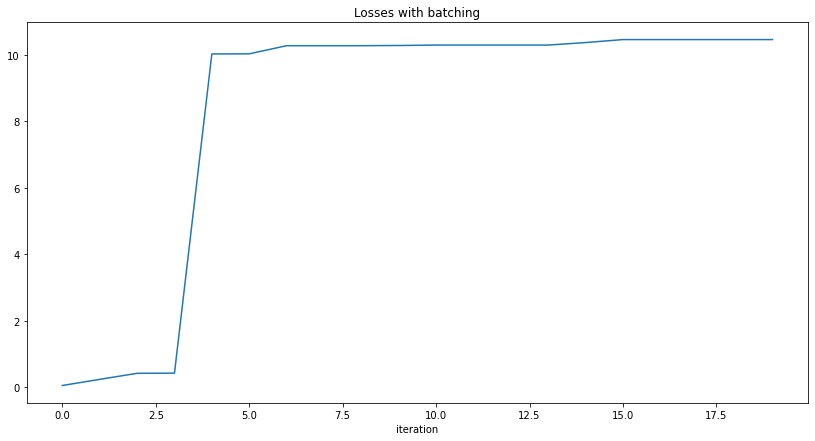

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(loss8)
plt.xlabel('iteration')
plt.title('Losses with batching');
plt.savefig('assets/loss_batching.png')